## [Contours : Getting Started](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_contours/py_contours_begin/py_contours_begin.html#contours-getting-started)

cv2.findContours(), cv2.drawContours()

作用：The contours are a useful tool for shape analysis and object detection and recognition.

* For better accuracy,use binary images. So befor finding contours, apply threshold or canny edge detection.
* cv2.findContours() function modifies the source image. So if you want image even after finding contours, already store it to some other variables.
* In OpenCV, finding contours is like dinding white object from black background. So remember, object to be found should be white and backgound should be black.

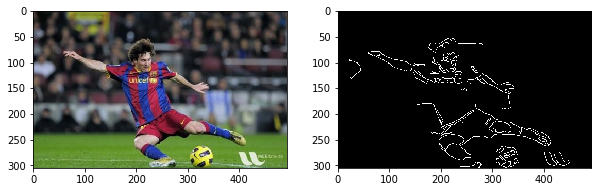

((305, 493), (60,), (1, 60, 4))

In [12]:
import numpy as np 
import cv2
import sys
sys.path.append('../')
import ipynb_importer
from my_tools import tools

soccer=cv2.imread('images/messipyr.jpg')
soccer_gray=cv2.cvtColor(soccer,cv2.COLOR_BGR2GRAY)
soccer_blur = cv2.GaussianBlur(soccer_gray,(5,5),0)
soccer_canny=cv2.Canny(soccer_blur,50,250) 
ret,img_threshold=cv2.threshold(soccer_canny,100,255,cv2.THRESH_BINARY)

img_contours,contours,hierarchy=cv2.findContours(img_threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
tools.show_bgr(soccer,img_contours)
img_contours.shape,np.array(contours).shape,hierarchy.shape

#### 参数说明：
img_contours,contours,hierarchy=cv2.findContours(img_threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

img_threshold为被检测灰度图

cv2.RETR_TREE mode-轮廓的检索模式：
   * cv2.RETR_EXTERNAL表示只检测外轮廓
   * cv2.RETR_LIST检测的轮廓不建立等级关系
   * cv2.RETR_CCOMP建立两个等级的轮廓，上面的一层为外边界，里面的一层为内孔的边界信息。如果内孔内还有一个连通物体，这个物体的边界也在顶层。
   * cv2.RETR_TREE建立一个等级树结构的轮廓。

cv2.CHAIN_APPROX_SIMPLE  method-轮廓的近似办法
>主要是为了节省内存，比如表示一个长方形的轮廓，不需要记录周长上所有的点（cv2.CHAIN_APPROX_NONE），只需要四个点即可(cv2.CHAIN_APPROX_SIMPLE）

 * cv2.CHAIN_APPROX_NONE存储所有的轮廓点，相邻的两个点的像素位置差不超过1，即max（abs（x1-x2），abs（y2-y1））==1
 * cv2.CHAIN_APPROX_SIMPLE压缩水平方向，垂直方向，对角线方向的元素，只保留该方向的终点坐标，例如一个矩形轮廓只需4个点来保存轮廓信息
 * cv2.CHAIN_APPROX_TC89_L1，CV_CHAIN_APPROX_TC89_KCOS使用teh-Chinl chain 近似算法
 
  It removes all redundant【被裁剪的】 points and compresses the contour, thereby saving memory.
  Below image of a rectangle demonstrate【示范操作】 this technique.
 hierarchy 【haɪ(ə)ˌrɑrki】 等级制度；统治集团；等级体系
 
 
 ## How to draw the contours?
 
 cv2.drawContours（）
 
 * 第一个参数：source image
 * 第二个参数：contours
 * 第三个参数：要绘制的contours index,如果要全部绘制传 -1
 * 剩下的参数就是颜色、线段粗细

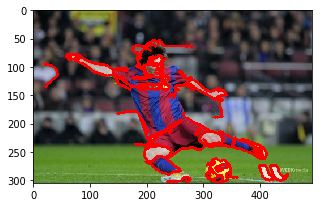

In [17]:
soccer_draw=cv2.drawContours(soccer,contours,-1,(0,0,250),1)
tools.show_bgr(soccer_draw)

## [Contour Features](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html#contour-features)

area, perimeter(边缘), centroid（中心）, bounding box（边框） etc

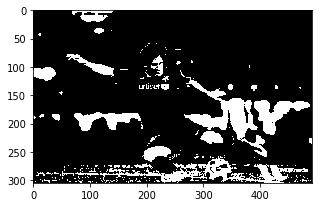

{'m00': 0.0,
 'm10': 0.0,
 'm01': 0.0,
 'm20': 0.0,
 'm11': 0.0,
 'm02': 0.0,
 'm30': 0.0,
 'm21': 0.0,
 'm12': 0.0,
 'm03': 0.0,
 'mu20': 0.0,
 'mu11': 0.0,
 'mu02': 0.0,
 'mu30': 0.0,
 'mu21': 0.0,
 'mu12': 0.0,
 'mu03': 0.0,
 'nu20': 0.0,
 'nu11': 0.0,
 'nu02': 0.0,
 'nu30': 0.0,
 'nu21': 0.0,
 'nu12': 0.0,
 'nu03': 0.0}

In [11]:
#1.Moments

import cv2
import numpy as np

img = cv2.imread('images/messipyr.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
_,contours,hierarchy = cv2.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv2.moments(cnt)


import sys
sys.path.append('../')
import ipynb_importer
from my_tools import tools
tools.show_bgr(_)
M
